In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import pandas as pd
from scipy import stats

Analytical model for the ultrasound backscatter:

$\mu = c_1 + c_2(100 - g - s)d50 + c_3g + c_4s$

Parameters are $x = \begin{bmatrix} c_1 & c_2 & c_3 & c_4 \end{bmatrix}^T$. With 25 measurements of the Lambert parameter,  $y = \begin{bmatrix} \mu_{01} & \mu_{02} & \cdots & \mu_{25} \end{bmatrix}^T$. Model matrix is:

$A = \begin{bmatrix} 1 & (100 - g_{01} - s_{01})d50_{01} & g_{01} & s_{01} \\
                     1 & (100 - g_{02} - s_{02})d50_{02} & g_{02} & s_{02} \\
                     \vdots & \vdots & \vdots & \vdots \\
                     1 & (100 - g_{25} - s_{25})d50_{25} & g_{25} & s_{25} \\ \end{bmatrix}$

In [2]:
#Import the raw data

data = np.loadtxt("final_assgn_data.txt")
data_pd = pd.DataFrame(data)
data_pd.columns = ['d50', 'g', 's', 'mu']
display(Markdown("Background scatter data" + f"{data_pd.to_latex(float_format='%.4g')}"))

Background scatter data\begin{tabular}{lrrrr}
\toprule
 & d50 & g & s & mu \\
\midrule
0 & 33 & 0 & 0.5 & -22 \\
1 & 221 & 0 & 0.5 & -16 \\
2 & 100 & 0 & 0.5 & -16 \\
3 & 28 & 0 & 0.5 & -22 \\
4 & 501 & 56.6 & 0.8 & -8 \\
5 & 404 & 0 & 0.2 & -19 \\
6 & 281 & 0 & 0.2 & -18 \\
7 & 233 & 0 & 0.1 & -19 \\
8 & 33 & 0 & 0.01 & -23 \\
9 & 30 & 0 & 0.01 & -22 \\
10 & 238 & 0 & 0.01 & -21 \\
11 & 337 & 0.04 & 0.02 & -22 \\
12 & 405 & 14.3 & 0.5 & -12 \\
13 & 399 & 7.75 & 0.18 & -12 \\
14 & 41 & 0 & 0.01 & -23 \\
15 & 318 & 0 & 0.01 & -21 \\
16 & 432 & 0.4 & 0.3 & -20 \\
17 & 506 & 70.2 & 0.7 & -8 \\
18 & 437 & 49.95 & 0.71 & -7 \\
19 & 519 & 32 & 2 & -10 \\
20 & 398 & 30 & 5.1 & -5 \\
21 & 357 & 48 & 0.4 & -9 \\
22 & 389 & 49.5 & 2.1 & -8 \\
23 & 367 & 0.07 & 0.17 & -20 \\
24 & 399 & 39.5 & 1.5 & -11 \\
\bottomrule
\end{tabular}


In [3]:
y = data[:,3]

A1 = np.ones(len(y))
A2 = (100 - data[:,1] - data[:,2])*data[:,0]
A3 = data[:,1]
A4 = data[:,2]
A = np.column_stack((A1, A2, A3, A4))

# Question-a

$\hat{x} = (A^TA)^{-1}A^Ty$

In [4]:
x_hat = inv(A.T @ A) @ A.T @ y

display(Markdown("$\hat{x}=$" + f"{pd.DataFrame(x_hat).to_latex(index=False,header=False,float_format='%.4G')}"))

$\hat{x}=$\begin{tabular}{r}
\toprule
\midrule
-22.14 \\
9.537E-05 \\
0.1925 \\
1.729 \\
\bottomrule
\end{tabular}


$c_1 = -22.14, c_2 = 9.537\times10^{-5}, c_3 = 0.1925, c_4 = 1.729$

# Question-b

$\hat{y} = A\hat{x}$

$\hat{e} = y - \hat{y}$

In [5]:
y_hat = A @ x_hat
e_hat = y - y_hat

display(Markdown("$\hat{e}=$" + f"{pd.DataFrame(e_hat).to_latex(index=False,header=False,float_format='%.4G')}"))

$\hat{e}=$\begin{tabular}{r}
\toprule
\midrule
-1.042 \\
3.174 \\
4.322 \\
-0.9947 \\
-0.178 \\
-1.056 \\
1.115 \\
0.7424 \\
-1.197 \\
-0.1681 \\
-1.152 \\
-3.119 \\
3.227 \\
4.829 \\
-1.273 \\
-1.915 \\
-2.552 \\
-1.992 \\
2.237 \\
-0.7485 \\
0.08121 \\
1.448 \\
-0.8186 \\
-1.664 \\
-1.306 \\
\bottomrule
\end{tabular}


$\sigma_y^2 = \frac{\hat{e}^T\hat{e}}{m - n}$

$Q_y = \sigma_y^2I_m$

In [6]:
m = len(y)
n = 4
dof = m - n

display(Markdown(f"Degrees of freedom $m - n = {dof}$"))

Degrees of freedom $m - n = 21$

In [7]:
var = e_hat.T @ e_hat / dof

display(Markdown(f"$\sigma^2={var:.4G}$"))

$\sigma^2=5.171$

In [8]:
Qy = var * np.eye(m)

$Q_y = 5.171I_{25}$

# Question-c

For unweighted least-squares solution:

$Q_{\hat{x}} = (A^TA)^{-1}A^TQ_yA(A^TA)^{-1}$

Substituting $Q_y = \sigma^2I$ above:

$Q_{\hat{x}} = (A^TA)^{-1}A^TQ_yA(A^TA)^{-1}$

$Q_{\hat{x}} = \sigma^2(A^TA)^{-1}$

In [9]:
Q_x_hat = inv(A.T @ A)*var

display(Markdown("$Q_{\hat{x}}=$" + f"{pd.DataFrame(Q_x_hat).to_latex(index=False,header=False,float_format='%.4G')}"))

$Q_{\hat{x}}=$\begin{tabular}{rrrr}
\toprule
\midrule
1.015 & -3.064E-05 & -0.005956 & -0.04235 \\
-3.064E-05 & 1.385E-09 & 5.25E-08 & -1.663E-06 \\
-0.005956 & 5.25E-08 & 0.0005052 & -0.004795 \\
-0.04235 & -1.663E-06 & -0.004795 & 0.2289 \\
\bottomrule
\end{tabular}


In [10]:
sigma_x_hat = np.sqrt(np.diag(Q_x_hat))

display(Markdown("$\sigma_{\hat{x}}=$" + f"{pd.DataFrame(sigma_x_hat).to_latex(index=False,header=False,float_format='%.4G')}"))

$\sigma_{\hat{x}}=$\begin{tabular}{r}
\toprule
\midrule
1.008 \\
3.721E-05 \\
0.02248 \\
0.4784 \\
\bottomrule
\end{tabular}


# Question-d

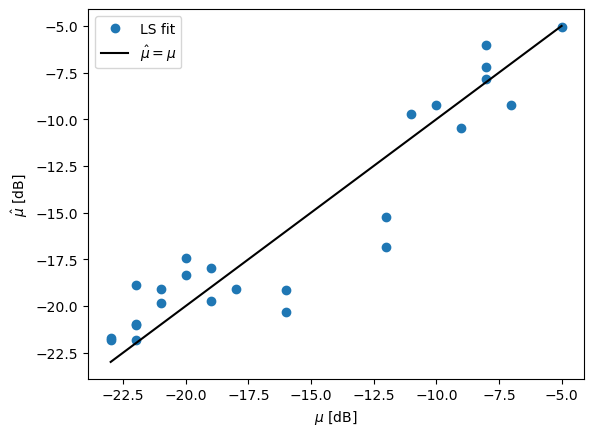

In [11]:
fig_d, ax_d = plt.subplots()
ax_d.plot(y, y_hat, 'o', label="LS fit")
ax_d.plot(np.sort(y), np.sort(y), 'k', label=r"$\hat{\mu}=\mu$")
ax_d.set_xlabel(r'$\mu$ [dB]')
ax_d.set_ylabel(r'$\hat{\mu}$ [dB]')
ax_d.legend()


# Question-e

For unweighted least-squares solution:

$Q_{\hat{e}} = P^\perp Q_y (P^\perp)^T$

$P = A(A^TA)^{-1}A^T$

$P^\perp = I_m - P$

In [12]:
P = A @ inv(A.T @ A) @ A.T
P_orth = np.eye(m) - P

Q_e_hat = P_orth @ Qy @ P_orth.T

sigma_e_hat = np.sqrt(np.diag(Q_e_hat))
norm_e_hat = e_hat / sigma_e_hat

display(Markdown("$w =$" + f"{pd.DataFrame(norm_e_hat).to_latex(index=False,header=False,float_format='%.4G')}"))

$w =$\begin{tabular}{r}
\toprule
\midrule
-0.5007 \\
1.44 \\
2.009 \\
-0.4794 \\
-0.0871 \\
-0.5028 \\
0.5082 \\
0.3373 \\
-0.5742 \\
-0.0808 \\
-0.524 \\
-1.446 \\
1.481 \\
2.248 \\
-0.6079 \\
-0.8826 \\
-1.232 \\
-1.073 \\
1.067 \\
-0.3538 \\
0.08037 \\
0.6952 \\
-0.3916 \\
-0.7781 \\
-0.6016 \\
\bottomrule
\end{tabular}


# Question-f

Significance level $\alpha = 0.1$

In [13]:
from scipy.stats import t

alpha = 0.1

#For 2-tailed test 
q = 1 - alpha/2

#Quantile function aka inverse cdf for t-distribution
k_alpha = t.ppf(q, dof)

display(Markdown(f"$k_{{0.95}} = {k_alpha:.4G}$"))

$k_{0.95} = 1.721$

In [14]:
data_pd_outliers = data_pd.iloc[np.argwhere(np.abs(norm_e_hat) > k_alpha).flatten()]

display(Markdown("Outliers" + f"{data_pd_outliers.to_latex(float_format='%.4g')}"))

Outliers\begin{tabular}{lrrrr}
\toprule
 & d50 & g & s & mu \\
\midrule
2 & 100 & 0 & 0.5 & -16 \\
13 & 399 & 7.75 & 0.18 & -12 \\
\bottomrule
\end{tabular}


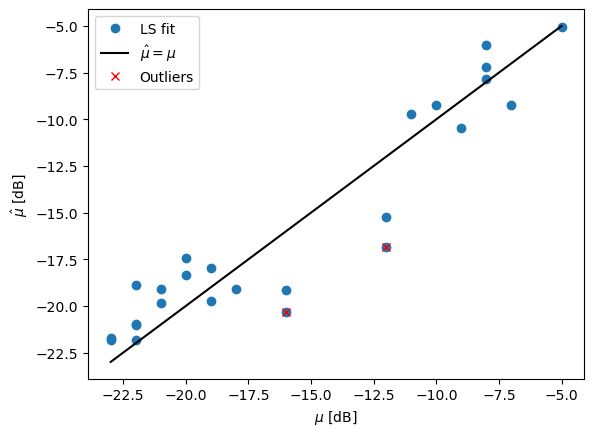

In [15]:
y_hat_outliers = y_hat[np.argwhere(np.abs(norm_e_hat) > k_alpha)]
y_outliers = y[np.argwhere(np.abs(norm_e_hat) > k_alpha)]

ax_d.plot(y_outliers, y_hat_outliers, 'rx', label="Outliers")
ax_d.legend()
display(fig_d)